# Tâche 9: les bandes de phonon


## Imports et téléchargement de la structure de bande

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pymatgen.ext.matproj import MPRester
from pymatgen import Structure
from jupyter_jsmol.pymatgen import quick_view
from pymatgen.phonon import plotter
from pymatgen.phonon.plotter import PhononBSPlotter
from pymatgen.phonon.bandstructure import PhononBandStructure
from pymatgen.core.lattice import Lattice

/usr/local/lib64/python3.6/site-packages/pymatgen/phonon/bandstructure.py:455: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/usr/local/lib64/python3.6/site-packages/pymatgen/phonon/bandstructure.py:456: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



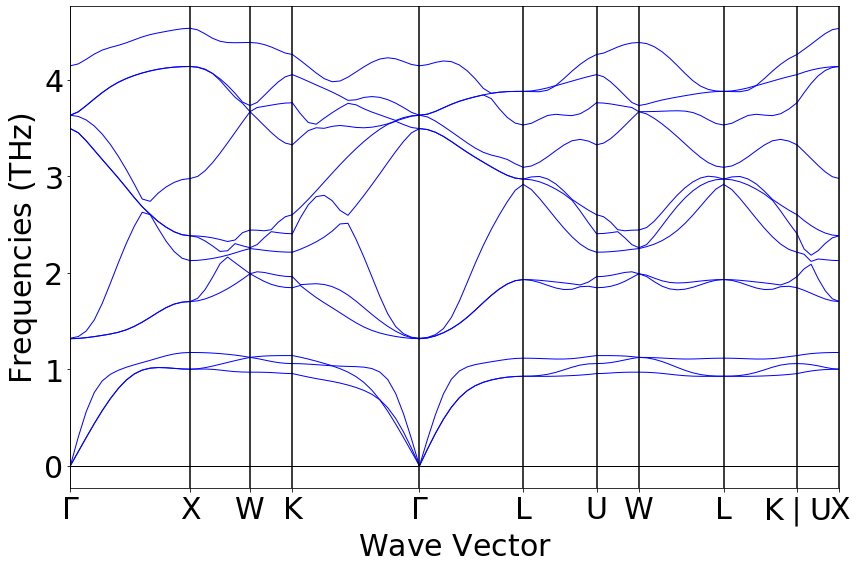

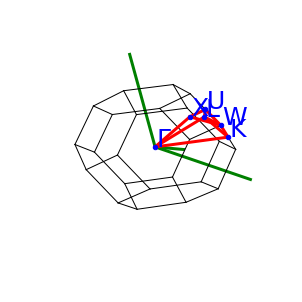

In [3]:
# Récupération de la structure (bande)
with MPRester("m5wyacFUOgt3WAfAgu9M") as m:
    structure_p = m.get_phonon_bandstructure_by_material_id("mp-867168")
    plot = PhononBSPlotter(structure_p)
    plot.get_plot()
    
# Zone de Brillouin
PhononBSPlotter(structure_p).plot_brillouin()

Lorsqu'on regarde le graphique, on observe 3 directions de propagation $Γ-X$, $K-Γ$ et $Γ-L$.

La vitesse du son est définie comme suivante : $v_s$ = $\frac{dw}{dq}$. Avec $w$ le vecteur de dispersion et $q$ le vecteur d'onde.

In [4]:
f = plot.bs_plot_data()['frequency']
dist = plot.bs_plot_data()['distances'] 

La vitesse du son dans la direction Γ−X est de 3179.2906169758194 m/s.
La vitesse du son selon la direction K-Γ est de 1719.8994402064402 m/s.
La vitesse du son selon la direction Γ−L est de 1720.8871199321509 m/s.


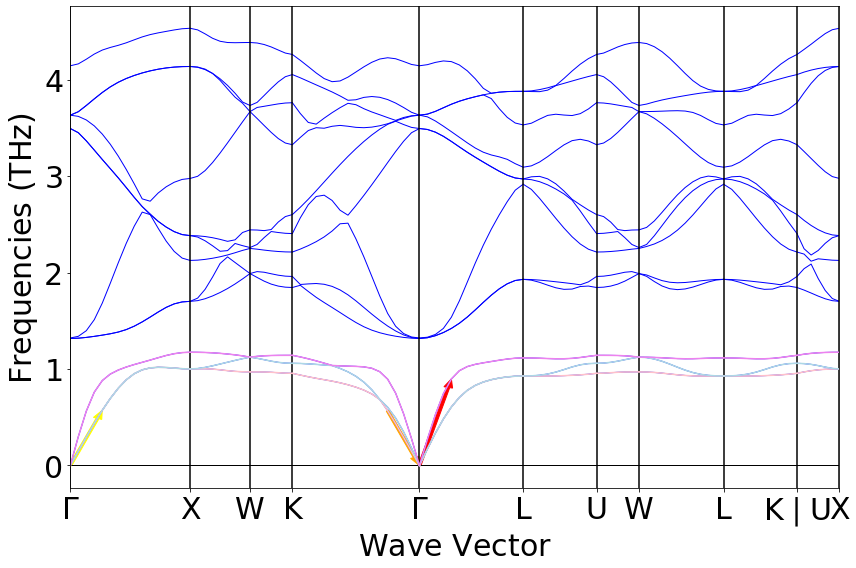

In [25]:
f1 = f[0][1]
d1 = dist[0]
x1 = dist[0][4] - dist[0][0]
y1 = f[0][1][4] - f[0][1][0]

d2 = dist[3]
f2 = f[3][0]
x2 = dist[3][-1] - dist[3][-5]
y2 = f[3][0][-1] - f[3][0][-5]

d3 = dist[4]
f3 = f[4][2]
x3 = dist[4][4] - dist[4][0]
y3 = f[4][2][4] - f[4][2][0]


#1. Γ-X
pente1 = f[4][2][1] - f[4][2][0]
v1 = 2*np.pi*np.abs((pente1)*(10**2))/((dist[4][1]-dist[4][0]))
print("La vitesse du son dans la direction Γ−X est de " + str(v1) + " m/s.")

#2. K-Γ
v2 = 2*np.pi*np.abs((f[3][0][-1] - f[3][0][-2])*(10**2))/((dist[3][-1]-dist[3][-2]))
print("La vitesse du son selon la direction K-Γ est de " + str(v2) + " m/s.")

#3. Γ−L
v3 = 2*np.pi*np.abs((f[0][1][1]-f[0][1][0])*(10**2))/((dist[0][1]-dist[0][0]))
print("La vitesse du son selon la direction Γ−L est de " + str(v3) + " m/s.")

# Graphique
plot.get_plot()

for i in range(len(dist)):
    plt.plot(dist[i],f[i][0],'pink')
    plt.plot(dist[i],f[i][1],'lightblue')
    plt.plot(dist[i],f[i][2],'violet')

plt.arrow(d1[0], f1[0], x1, y1, color = 'yellow', width = 0.02, length_includes_head = True)
plt.arrow(d2[-5], f2[-5], x2, y2, color = 'orange', width = 0.02, length_includes_head = True)
plt.arrow(d3[0], f3[0], x3, y3, color = 'red', width = 0.02, length_includes_head = True)

plt.show()



Le graphe ci-dessus montre pour les 3 bandes acoustiques différentes, avec pour chacune une flèche l'approximant quand $w$ tend vers 0. 